# Feature engineering
This notebook uses the information about Polish Parliment deputies scraped in the previous notebook and cleans up a database.

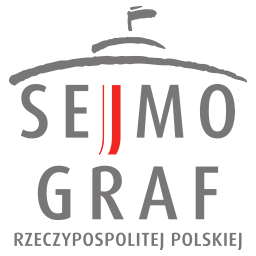


# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/SEJMograf /mydrive

# navigate to the working directory
%cd /mydrive

ln: failed to create symbolic link '/mydrive/SEJMograf': File exists
/content/gdrive/My Drive/Colab Notebooks/SEJMograf


## Libraries & functions
Let's now install missing libraries and import the necessary libraries and functions we're gonna use in this notebook.

- `requests` - http handling
- `BeautifulSoup` - html parsing & web-scraping
- `urllib.request` - url-opening
- `tqdm.notebook` - loop progress bar for notebooks
- `timeit` - cell runtime check
- `numpy` - linear algebra
- `pandas` - data manipulation & analysis
- `sys` - system-specific parameters & functions
- `os` - operating system interfaces
- `os.path` - pathname manipulation
- `json` - JSON files handling

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import re

# import nltk
# from nltk import *
# nltk.download('stopwords')
# nltk.download('punkt')
# from nltk.corpus import stopwords
# import spacy


# !pip install ner-d
# from nerd import ner

# import requests
# import bs4
# from bs4 import BeautifulSoup
# import tqdm.notebook as tq
# import timeit


# import time


# Load data

In [4]:
df = pd.read_pickle('df_deputies.pkl')
df.head()

,name,url,picture,election_date,election_list,election_constituency,election_votes,oath_date,service_history,party,birth_date,birth_place,education,schools,occupation,number_of_speeches,interpellations_pursued,interpellations_dismissed,inquiries_pursued,inquiries_dismissed,statements,current_questions,voting_frequency,committees,delegations,groups,offices,coworkers,asset_declarations,benefit_register,emails
0,Adamczyk Andrzej,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,13-10-2019,Prawo i Sprawiedliwość,Kraków,29686,12-11-2019,"poseł V kadencji, poseł VI kadencji, poseł VII...",Klub Parlamentarny Prawo i Sprawiedliwość,04-01-1959,Krzeszowice,wyższe,"Społeczna Akademia Nauk w Łodzi, Wydział Zarzą...",parlamentarzysta,"[6, https://www.sejm.gov.pl/wypowiedzi.xsp?id=...",[],[],[],[],[],[],98.46,[],[],[],"[[*Biuro Poselskie Posła Andrzeja Adamczyka, [...","[[Adam Bielecki, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...",[],Andrzej.Adamczyk@sejm.pl
1,Adamczyk Rafał,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,13-10-2019,Sojusz Lewicy Demokratycznej,Katowice,12148,12-11-2019,brak,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",30-05-1974,Dąbrowa Górnicza,wyższe,"Politechnika Śląska, Organizacja i Zarządzanie...",samorządowiec,"[18, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",99.57,"[[Komisja Administracji i Spraw Wewnętrznych,...","[[Polsko-Niderlandzka Grupa Parlamentarna, /SQ...","[[Parlamentarny Zespół Antysmogowy, agent.xsp?...",[[*Biuro Poselskie Posła na Sejm RP Rafała Ada...,"[[Michał Curyło, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Rafal.Adamczyk@sejm.pl
2,Adamowicz Piotr,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,13-10-2019,Koalicja Obywatelska,Gdańsk,41795,12-11-2019,brak,Klub Parlamentarny Koalicja Obywatelska - Plat...,26-06-1961,Elbląg,średnie ogólne,VI LO GdaÅ„sk (1980),dziennikarz,"[13, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],"[Oświadczenia:, https://www.sejm.gov.plinterpe...","[Pytania w sprawach bieżących:, https://www.se...",98.71,"[[Komisja Kultury i Środków Przekazu, agent.x...","[[Grupa Parlamentarna Polska-Republika Korei, ...","[[Parlamentarny Zespół ds. Białorusi, agent.xs...","[[*Biuro Posła na Sejm RP Piotra Adamowicza, [...","[[Zofia Lisicka, Asystent społeczny, https://o...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Piotr.Adamowicz@sejm.pl
3,Ajchler Romuald,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,13-10-2019,Sojusz Lewicy Demokratycznej,Piła,14438,12-11-2019,"poseł II kadencji, poseł III kadencji, poseł I...","Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",19-01-1949,Duszniki Wielkopolskie,średnie zawodowe,"PaÅ„stwowe Technikum Rolnicze, Rolnictwo - tec...",rolnik,"[42, https://www.sejm.gov.pl/wypowiedzi.xsp?id...","[Interpelacje, którym nadano bieg:, https://ww...",[],"[Zapytania, którym nadano bieg:, https://www.s...",[],[],"[Pytania w sprawach bieżących:, https://www.se...",96.54,"[[Komisja Polityki Społecznej i Rodziny, agen...",[],"[[Wielkopolski Zespół Parlamentarny, agent.xsp...",[[*Biuro Poselskie Posła na Sejm Romualda Ajch...,"[[Lidia Nowakowska, Pracownik, https://orka.se...","[[Początek kadencji, https://orka.sejm.gov.pl/...","[[2020-01-09, https://orka.sejm.gov.pl/rkor9.n...",Romuald.Ajchler@sejm.pl
4,Andruszkiewicz Adam,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.p

## Initiate clean DataFrame

In [5]:
df_clean = pd.DataFrame()

# Clean party data

## Name

In [6]:
df_clean['first_name'] = df['name'].apply(lambda x: x.split(' ')[1])
df_clean['middle_name'] = df['name'].apply(lambda x: x.split(' ')[2] if len(x.split(' ')) > 2 else None)
df_clean['last_name'] = df['name'].apply(lambda x: x.split(' ')[0])
df_clean.head()

,first_name,middle_name,last_name
0,Andrzej,None,Adamczyk
1,Rafał,None,Adamczyk
2,Piotr,None,Adamowicz
3,Romuald,None,Ajchler
4,Adam,None,Andruszkiewicz


## Profile url

In [7]:
df_clean['profile_url'] = df['url'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...


## Picture

In [8]:
df_clean['picture'] = df['picture'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...


## Election date

In [9]:
df_clean['election_date'] = df['election_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13


## Election list

In [10]:
df_clean['election_list'] = df['election_list'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość


## Election constituency

In [11]:
df_clean['election_constituency'] = df['election_constituency'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok


## Election votes

In [12]:
df_clean['election_votes'] = df['election_votes'].apply(lambda x: int(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829


## Oath date

In [13]:
df_clean['oath_date'] = df['oath_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12


## Service history

In [14]:
def historyList(string):
  if string == 'brak':
    return list()
  else:
    return string.split(', ')

df_clean['service_history'] = df['service_history'].apply(lambda x: historyList(x))

def divideHistory(lst):
  sejm = []
  senat = []
  for l in lst:
    if re.search('pos.+', l):
      sejm.append(l)
    elif re.search('sen.+', l):
      senat.append(l)
  return (sejm, senat)

df_clean['sejm_history'] = df_clean['service_history'].apply(lambda x: divideHistory(x)[0])
df_clean['senat_history'] = df_clean['service_history'].apply(lambda x: divideHistory(x)[1])

def extractTerms(lst, term):
  # term = re.compile(f'.+{term}.+')
  for l in lst:
    if re.match(f'.+\s{term}\s.+', l):
      return True
  return False


terms = ['IX', 'X', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII']

for t in terms:
  if t in ['IX', 'X']:
    col_name = f'sejm_prl_term_{t}'
  else: 
    col_name = f'sejm_term_{t}'
  df_clean[col_name] = df_clean['sejm_history'].apply(lambda x: extractTerms(x, t))

for t in terms:
  if t in ['IX', 'X']:
    col_name = f'senat_prl_term_{t}'
  else: 
    col_name = f'senat_term_{t}'
  df_clean[f'senat_term_{t}'] = df_clean['senat_history'].apply(lambda x: extractTerms(x, t))

df_clean['sejm_term_IX'] = True

df_clean.drop(['service_history', 'sejm_history', 'senat_history'], axis=1, inplace=True)

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


## Party

In [15]:
df_clean['club'] = df['party'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S..."
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S..."
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość


# Clean CV data

## Birth date

In [16]:
df_clean['birth_date'] = df['birth_date'].apply(lambda x: datetime.strptime(str(x), '%d-%m-%Y'))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30


## Birth place

In [17]:
df_clean['birth_place'] = df['birth_place'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo


## Education

In [18]:
df_clean['education'] = df['education'].apply(lambda x: str(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe


## Schools

### School name

In [19]:
def schoolName(name):
  split_name = name.split(', ')
  name = str(split_name[0])
  return name

def stripYear(name):  
  return re.sub('\(\d{4}\)', '', name)

def fixChars(name):
  name = name.replace('Å„', 'ń')
  name = name.replace('Å', 'ł')
  return name.strip()

df_clean['school'] = df['schools'].apply(lambda x: schoolName(x))
df_clean['school'] = df_clean['school'].apply(lambda x: stripYear(x))
df_clean['school'] = df_clean['school'].apply(lambda x: fixChars(x))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku


### Faculty

In [20]:
# # def faculty(name):
# #   search = re.search('Wydział.+-\s', name)
# #   if search == None:
# #     # print(name)
# #     return None, None
# #   else:
# #     search = search.group(0).rstrip(' -')
# #     items = search.split(', ')


# #     if len(items) == 1:
# #       faculty = items[0]
# #       field = None
# #     elif len(items) == 2:
# #       faculty = items[0]
# #       field = items[-1]      
# #     elif len(items) == 3:
# #       print(items)
# #       if items[2].startswith('Inz'):
# #         faculty = items[0]
# #         field = ', '.join([items[1], items[2]])
# #       elif re.match('^[A-Z]', items[2]):
# #         faculty = ', '.join([items[0], items[1]])
# #         field = items[2]
# #       elif re.match('^[a-z]', items[2]):
# #         faculty = items[0]
# #         field = ', '.join([items[1], items[2]])
      
# #       print(f'Faculty: {faculty}\nField: {field}\n\n')

# #     return faculty, field

# def faculty(name):
#   s1 = re.search('.*[Uu]ni.*', name)
#   s2 = re.search('.*[Aa]kad.*', name)
#   s3 = re.search('.*[Pp]oli.*', name)
#   s4 = re.search('.*[Ww]yższ.*', name)
#   s5 = re.search('.*[Gg]łów.*', name)
#   s6 = re.search('.*[Uu]czel', name)
#   s7 = re.search('.*[Cc]olle', name)
#   if s1:
#     search = s1.group(0)
#     items = search.split(', ')
#     if items[1].startswith('Wydzia'):
#       faculty = items[1]
#     else:
#       print(items[1:])
    

#     # print(items[1:])
#   else:
#     # print(name)
#     pass
  

# df_clean['faculty'] = df['schools'].apply(lambda x: faculty(x))
# df_clean['field'] = df['schools'].apply(lambda x: faculty(x))
# df_clean.head()

### Academic title

In [21]:
def academicTitle(name):
  search = re.search('-\s[a-z]+\s\(', name)
  if search == None:
    return None
  else:
    search = search.group(0).lstrip('- ').rstrip(' (')
    return search

df_clean['title'] = df['schools'].apply(lambda x: academicTitle(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister


###Graduation year

In [22]:
def schoolYear(name):
  search = re.search('\d{4}', name)
  if search == None:
    return None
  else:
    search = datetime.strptime(search.group(0), '%Y').year
    return search

df_clean['graduation_year'] = df['schools'].apply(lambda x: schoolYear(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0


## Occupation

In [23]:
def occupation(name):
  if re.search('.*[Pp]arlam.*|.*[Pp]os.*|.*[Pp]olityk', name):
    return 'poseł'

  elif re.search('.*[Uu]rz.*|.*[Pp]racow.*|.*[Ss]ekret.*', name):
    return 'urzędnik'

  elif re.search('.*[Ss]amorz.*', name):
    return 'samorządowiec'
  
  elif re.search('.*[Aa]dwok.*|.*[Pp]rawn.*', name):
    return 'prawnik/adwokat'

  elif re.search('.*[Nn]auczy.*|.*[Ww]ykład.*|.*[Ee]duk.*|[Pp]rofeso.*', name):
    return 'nauczyciel/wykładowca'

  elif re.search('.*[Dd]zienn.*|.*[Pp]ublic.*', name):
    return 'dziennikarz/publicysta'

  elif re.search('.*[Ll]eka.*', name):
    return 'lekarz'

  elif re.search('.*[Ee]konom.*', name):
    return 'ekonomista'

  elif re.search('.*[Pp]olitol.*', name):
    return 'politolog' # to kill

  elif re.search('.*[Hh]istor.*', name):
    return 'historyk' # to kill

  elif re.search('.*[Pp]rzeds.*', name):
    return 'przedsiębiorca'

  elif re.search('.*[Ff]ilol.*', name):
    return 'filolog'

  elif re.search('.*[Ss]ocjo.*', name):
    return 'socjolog'

  elif re.search('.*[Mm]en.dżer.*', name):
    return 'menedżer'

  elif re.search('.*[Ii]nż.*', name):
    return 'inżynier'

  elif re.search('.*[Rr]olnik.*', name):
    return 'rolnik'

  elif re.search('.*[Aa]ktor.*|.*[Rr]eż.*', name):
    return 'aktor/reżyser'

  elif re.search('.*[Ff]iloz.*', name):
    return 'filozof'

  else:
    return name

df_clean['occupation'] = df['occupation'].apply(lambda x: occupation(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł


# Clean activity data

## Speeches

In [24]:
def speeches(name):
  if len(name) == 2:
    number = int(name[0])
    url = name[1]
  else:
    number = 0
    url = None
  return number, url

df_clean['speeches_number'] = df['number_of_speeches'].apply(lambda x: speeches(x)[0])
df_clean['speeches_url'] = df['number_of_speeches'].apply(lambda x: speeches(x)[1])
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...


## Interpellations

In [25]:
def interpellations(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]

  return number, url

df_clean['interpellations_pursued_number'] = df['interpellations_pursued'].apply(lambda x: interpellations(x)[0])
df_clean['interpellations_pursued_url'] = df['interpellations_pursued'].apply(lambda x: interpellations(x)[1])
df_clean['interpellations_dismissed_number'] = df['interpellations_dismissed'].apply(lambda x: interpellations(x)[0])
df_clean['interpellations_dismissed_url'] = df['interpellations_dismissed'].apply(lambda x: interpellations(x)[1])
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None


## Inquiries

In [26]:
def inquiries(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]
    
  return number, url

df_clean['inquiries_pursued_number'] = df['inquiries_pursued'].apply(lambda x: inquiries(x)[0])
df_clean['inquiries_pursued_url'] = df['inquiries_pursued'].apply(lambda x: inquiries(x)[1])
df_clean['inquiries_dismissed_number'] = df['inquiries_dismissed'].apply(lambda x: inquiries(x)[0])
df_clean['inquiries_dismissed_url'] = df['inquiries_dismissed'].apply(lambda x: inquiries(x)[1])
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None


## Statements

In [27]:
def statements(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]
    
  return number, url

df_clean['statements_number'] = df['statements'].apply(lambda x: statements(x)[0])
df_clean['statements_url'] = df['statements'].apply(lambda x: statements(x)[1])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None,0,None


## Current questions

In [28]:
def questions(name):
  if len(name) == 0:
    number = 0
    url = None
  else:
    number = int(name[2])
    url = name[1]
    
  return number, url

df_clean['current_questions_number'] = df['current_questions'].apply(lambda x: questions(x)[0])
df_clean['current_questions_url'] = df['current_questions'].apply(lambda x: questions(x)[1])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url,current_questions_number,current_questions_url
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None,0,None
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...,1,https://www.sejm.gov.plagent.xsp?symbol=POSELI...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None,0,None,0,None


## Voting frequency

In [29]:
df_clean['voting_frequency'] = df['voting_frequency'].apply(lambda x: float(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url,current_questions_number,current_questions_url,voting_frequency
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None,0,None,98.46
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,99.57
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...,1,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,98.71
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,96.54
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id=005&...,0,None,0,None,0,None,0,None,0,None,0,None,98.

## Memberships

### Helper function

In [30]:
def extractMembership(items, name):
  if len(items) != 0 and items[0][0] == name:
    return True
  else:
    return False

### Number of memberships

In [31]:
for name in ['committees', 'delegations', 'groups']:
  df_clean[name] = df[name].apply(lambda x: len(x))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,speeches_url,interpellations_pursued_number,interpellations_pursued_url,interpellations_dismissed_number,interpellations_dismissed_url,inquiries_pursued_number,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url,current_questions_number,current_questions_url,voting_frequency,committees,delegations,groups
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,https://www.sejm.gov.pl/wypowiedzi.xsp?id=001&...,0,None,0,None,0,None,0,None,0,None,0,None,98.46,0,0,0
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,https://www.sejm.gov.pl/wypowiedzi.xsp?id=002&...,357,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,7,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,99.57,3,1,5
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,https://www.sejm.gov.pl/wypowiedzi.xsp?id=003&...,40,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...,1,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,98.71,1,2,4
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,https://www.sejm.gov.pl/wypowiedzi.xsp?id=004&...,370,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,23,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,96.54,2,0,1
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06-30,Grajewo,wyższe,Uniwersytet w Białymstoku,magister,2014.0,poseł,1,https://www.sejm.gov.pl/wypowiedzi.xsp?id

### Committees

In [32]:
committees = set()

for item in df['committees']:
  
  if len(item) != 0:
    committees.add(item[0][0])

committees_dict = {f'committee_{n+1:02d}':x for n, x in enumerate(committees)}
committees_dict

{'committee_01': 'Komisja  Obrony Narodowej',
 'committee_02': 'Komisja  Polityki Senioralnej',
 'committee_03': 'Komisja  Zdrowia',
 'committee_04': 'Komisja  Łączności z Polakami za Granicą',
 'committee_05': 'Komisja  Polityki Społecznej i Rodziny',
 'committee_06': 'Komisja  do Spraw Petycji',
 'committee_07': 'Komisja  Kultury Fizycznej, Sportu i Turystyki',
 'committee_08': 'Komisja  Rolnictwa i Rozwoju Wsi',
 'committee_09': 'Komisja  Administracji i Spraw Wewnętrznych',
 'committee_10': 'Komisja  Regulaminowa, Spraw Poselskich i Immunitetowych',
 'committee_11': 'Komisja  Edukacji, Nauki i Młodzieży',
 'committee_12': 'Komisja  Samorządu Terytorialnego i Polityki Regionalnej',
 'committee_13': 'Komisja  Gospodarki Morskiej i Żeglugi Śródlądowej',
 'committee_14': 'Komisja  Gospodarki i Rozwoju',
 'committee_15': 'Komisja  Mniejszości Narodowych i Etnicznych',
 'committee_16': 'Komisja  Sprawiedliwości i Praw Człowieka',
 'committee_17': 'Komisja  Infrastruktury',
 'committee_18

In [33]:
for key, value in committees_dict.items():
  df_clean[key] = df['committees'].apply(lambda x: extractMembership(x, value))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,inquiries_pursued_url,inquiries_dismissed_number,inquiries_dismissed_url,statements_number,statements_url,current_questions_number,current_questions_url,voting_frequency,committees,delegations,groups,committee_01,committee_02,committee_03,committee_04,committee_05,committee_06,committee_07,committee_08,committee_09,committee_10,committee_11,committee_12,committee_13,committee_14,committee_15,committee_16,committee_17,committee_18,committee_19,committee_20,committee_21,committee_22,committee_23,committee_24,committee_25,committee_26,committee_27,committee_28,committee_29
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,None,0,None,0,None,0,None,98.46,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,99.57,3,1,5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,4,https://www.sejm.gov.plinterpelacje.xsp?symbol...,1,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,98.71,1,2,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,0,None,0,None,2,https://www.sejm.gov.plagent.xsp?symbol=POSELI...,96.54,2,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

### Delegations

In [34]:
delegations = set()
for item in df['delegations']:
  
  if len(item) != 0:
    delegations.add(item[0][0])

delegations_dict = {f'delegation_{n+1:02d}':x for n, x in enumerate(delegations)}
delegations_dict

{'delegation_01': 'Delegacja Sejmu i Senatu RP na Konferencję Parlamentarną Morza Bałtyckiego',
 'delegation_02': 'Polsko-Gruzińska Grupa Parlamentarna',
 'delegation_03': 'Polsko-Niemiecka Grupa Parlamentarna',
 'delegation_04': 'Delegacja Parlamentarna do Zgromadzenia Parlamentarnego RP i Ukrainy',
 'delegation_05': 'Polsko-Izraelska Grupa Parlamentarna',
 'delegation_06': 'Polsko-Brazylijska Grupa Parlamentarna',
 'delegation_07': 'Polsko-Duńska Grupa Parlamentarna',
 'delegation_08': 'Polsko-Bałkańska Grupa Parlamentarna',
 'delegation_09': 'Polsko-Grecka Grupa Parlamentarna',
 'delegation_10': 'Polsko-Norweska Grupa Parlamentarna',
 'delegation_11': 'Grupa Parlamentarna Polska-Zjednoczone Emiraty Arabskie',
 'delegation_12': 'Polsko-Kirgistańska Grupa Parlamentarna',
 'delegation_13': 'Polska Sekcja Stowarzyszona Zgromadzenia Parlamentarnego Frankofonii',
 'delegation_14': 'Polsko-Palestyńska Grupa Parlamentarna',
 'delegation_15': 'Polsko-Saudyjska Grupa Parlamentarna',
 'delegat

In [35]:
for key, value in delegations_dict.items():
  df_clean[key] = df['delegations'].apply(lambda x: extractMembership(x, value))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,delegation_10,delegation_11,delegation_12,delegation_13,delegation_14,delegation_15,delegation_16,delegation_17,delegation_18,delegation_19,delegation_20,delegation_21,delegation_22,delegation_23,delegation_24,delegation_25,delegation_26,delegation_27,delegation_28,delegation_29,delegation_30,delegation_31,delegation_32,delegation_33,delegation_34,delegation_35,delegation_36,delegation_37,delegation_38,delegation_39,delegation_40,delegation_41,delegation_42,delegation_43,delegation_44,delegation_45,delegation_46,delegation_47,delegation_48,delegation_49
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Biał

### Groups

In [36]:
groups = set()
for item in df['groups']:
  
  if len(item) != 0:
    groups.add(item[0][0])

groups_dict = {f'group_{n+1:02d}':x for n, x in enumerate(groups)}
groups_dict

{'group_01': 'Parlamentarny Zespół do spraw Równouprawnienia Społeczności LGBT+',
 'group_02': 'Parlamentarny Zespół ds. Pielęgniarek, Położnych i Pracowników Opieki Zdrowotnej',
 'group_03': 'Parlamentarny Zespół ds. Rozwoju Kół Gospodyń Wiejskich i Miejskich',
 'group_04': 'Parlamentarny Zespół ds. Rozwiązywania Problemów Uzależnień',
 'group_05': 'Parlamentarny Zespół ds. Ochrony Morza Bałtyckiego',
 'group_06': 'Parlamentarna Grupa Kobiet',
 'group_07': 'Parlamentarny Zespół ds. Legalizacji Marihuany',
 'group_08': 'Parlamentarny Zespół ds. Wspierania Młodzieżowych Rad przy Jednostkach Samorządu Terytorialnego',
 'group_09': 'Parlamentarny Zespół ds. Bezpieczeństwa Lekowego i Rynku Aptecznego w Polsce',
 'group_10': 'Parlamentarny Zespół ds. Energii Odnawialnej',
 'group_100': 'Łódzki Zespół Parlamentarny',
 'group_101': 'Parlamentarny Zespół ds. Onkologii',
 'group_102': 'Parlamentarny Zespół ds. Rozwoju Pomorza Środkowego',
 'group_103': 'Parlamentarny Zespół ds. Elektromobilnośc

In [37]:
for key, value in groups_dict.items():
  df_clean[key] = df['groups'].apply(lambda x: extractMembership(x, value))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,group_64,group_65,group_66,group_67,group_68,group_69,group_70,group_71,group_72,group_73,group_74,group_75,group_76,group_77,group_78,group_79,group_80,group_81,group_82,group_83,group_84,group_85,group_86,group_87,group_88,group_89,group_90,group_91,group_92,group_93,group_94,group_95,group_96,group_97,group_98,group_99,group_100,group_101,group_102,group_103
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/82D86...,2019-10-13,Prawo i Sprawiedliwość,Białystok,29829,2019-11-12,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1990-06

# Clean contact data

## Offices

In [38]:
def cleanTags(input):
  input = str(input)
  
  exp_tags = re.compile(r'<[^>]*>')
  input = re.sub(exp_tags, '', input)

  return input

df_clean['offices'] = df['offices'].apply(lambda x: len(x))

def extractOffice(items, number):
  if len(items) >= (number+1):
    name = items[number][0]
    address = items[number][1]
    address = ', '.join([cleanTags(x) for x in address if len(cleanTags(x)) > 0] )

    office = f'{name} - {address}'

    return office
  else:
    return False

max_offices = df_clean['offices'].max()

for n in range(max_offices):
  df_clean[f'office_{n+1:02d}'] = df['offices'].apply(lambda x: extractOffice(x, n))

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,group_74,group_75,group_76,group_77,group_78,group_79,group_80,group_81,group_82,group_83,group_84,group_85,group_86,group_87,group_88,group_89,group_90,group_91,group_92,group_93,group_94,group_95,group_96,group_97,group_98,group_99,group_100,group_101,group_102,group_103,offices,office_01,office_02,office_03,office_04,office_05,office_06,office_07,office_08,office_09
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,*Biuro Poselskie Posła Andrzeja Adamczyka - ul...,Filia Biura Poselskiego Posła Andrzeja Adamczy...,Małopolskie Biuro Prawa i Sprawiedliwości - ul...,False,False,False,False,False,False
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,*Biuro Poselskie Posła na Sejm RP Rafała Adamc...,Biuro Poselskie Posła na Sejm RP Rafała Adamcz...,False,False,False,False,False,False,False
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,*Biuro Posła na Sejm RP Piotra Adamowicza - ul...,False,False,False,False,False,False,False,False
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,*Biuro Poselskie Posła na Sejm Romualda Ajchle...,Biuro Poselskie Posła na Sejm RP Romualda Ajch...,False,False,False,False,False,False,False
4,Adam,None,Andr

## Coworkers

In [39]:
def numberOfCoworkers(items):

  coworkers = set()
  if len(items) != 0:
    for i in items:
      coworkers.add(i[0])
      
    return len(coworkers)
  else:
    return 0  

df_clean['coworkers'] = df['coworkers'].apply(lambda x: numberOfCoworkers(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,group_75,group_76,group_77,group_78,group_79,group_80,group_81,group_82,group_83,group_84,group_85,group_86,group_87,group_88,group_89,group_90,group_91,group_92,group_93,group_94,group_95,group_96,group_97,group_98,group_99,group_100,group_101,group_102,group_103,offices,office_01,office_02,office_03,office_04,office_05,office_06,office_07,office_08,office_09,coworkers
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,*Biuro Poselskie Posła Andrzeja Adamczyka - ul...,Filia Biura Poselskiego Posła Andrzeja Adamczy...,Małopolskie Biuro Prawa i Sprawiedliwości - ul...,False,False,False,False,False,False,11
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,*Biuro Poselskie Posła na Sejm RP Rafała Adamc...,Biuro Poselskie Posła na Sejm RP Rafała Adamcz...,False,False,False,False,False,False,False,7
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,*Biuro Posła na Sejm RP Piotra Adamowicza - ul...,False,False,False,False,False,False,False,False,2
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,*Biuro Poselskie Posła na Sejm Romualda Ajchle...,Biuro Poselskie Posła na Sejm RP Romualda Ajch...,False,False,False,False,False,False,False,2
4,Adam,None,Andruszkiewicz,htt

In [40]:
def extractCoworkers(items, number):

  if len(items) >= (number+1):
    name = items[number][0]
    function = items[number][1]
    info = items[number][2]
    return name, function, info

  else:
    return (False, False, False)

max_coworkers = df_clean['coworkers'].max()

for n in range(max_coworkers):
  df_clean[f'coworker_{n+1:02d}'] = df['coworkers'].apply(lambda x: extractCoworkers(x, n)[0])
  df_clean[f'coworker_{n+1:02d}_function'] = df['coworkers'].apply(lambda x: extractCoworkers(x, n)[1])
  df_clean[f'coworker_{n+1:02d}_info'] = df['coworkers'].apply(lambda x: extractCoworkers(x, n)[2])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,coworker_25_info,coworker_26,coworker_26_function,coworker_26_info,coworker_27,coworker_27_function,coworker_27_info,coworker_28,coworker_28_function,coworker_28_info,coworker_29,coworker_29_function,coworker_29_info,coworker_30,coworker_30_function,coworker_30_info,coworker_31,coworker_31_function,coworker_31_info,coworker_32,coworker_32_function,coworker_32_info,coworker_33,coworker_33_function,coworker_33_info,coworker_34,coworker_34_function,coworker_34_info,coworker_35,coworker_35_function,coworker_35_info,coworker_36,coworker_36_function,coworker_36_info,coworker_37,coworker_37_function,coworker_37_info,coworker_38,coworker_38_function,coworker_38_info
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9

## Asset declarations

In [41]:
df_clean['asset_declarations'] = df['asset_declarations'].apply(lambda x: len(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,coworker_26,coworker_26_function,coworker_26_info,coworker_27,coworker_27_function,coworker_27_info,coworker_28,coworker_28_function,coworker_28_info,coworker_29,coworker_29_function,coworker_29_info,coworker_30,coworker_30_function,coworker_30_info,coworker_31,coworker_31_function,coworker_31_info,coworker_32,coworker_32_function,coworker_32_info,coworker_33,coworker_33_function,coworker_33_info,coworker_34,coworker_34_function,coworker_34_info,coworker_35,coworker_35_function,coworker_35_info,coworker_36,coworker_36_function,coworker_36_info,coworker_37,coworker_37_function,coworker_37_info,coworker_38,coworker_38_function,coworker_38_info,asset_declarations
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,rolnik,42,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
4,Adam,None,Andruszkiewicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp

In [42]:
def extractDeclarations(items, number):

  if len(items) >= (number+1):
    name = items[number][0]
    info = items[number][1]
    return name, info

  else:
    return (False, False)

max_declarations = df_clean['asset_declarations'].max()

for n in range(max_declarations):
  df_clean[f'declaration_{n+1:02d}'] = df['asset_declarations'].apply(lambda x: extractDeclarations(x, n)[0])
  df_clean[f'declaration_{n+1:02d}_info'] = df['asset_declarations'].apply(lambda x: extractDeclarations(x, n)[1])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,coworker_27_function,coworker_27_info,coworker_28,coworker_28_function,coworker_28_info,coworker_29,coworker_29_function,coworker_29_info,coworker_30,coworker_30_function,coworker_30_info,coworker_31,coworker_31_function,coworker_31_info,coworker_32,coworker_32_function,coworker_32_info,coworker_33,coworker_33_function,coworker_33_info,coworker_34,coworker_34_function,coworker_34_info,coworker_35,coworker_35_function,coworker_35_info,coworker_36,coworker_36_function,coworker_36_info,coworker_37,coworker_37_function,coworker_37_info,coworker_38,coworker_38_function,coworker_38_info,asset_declarations,declaration_01,declaration_01_info,declaration_02,declaration_02_info
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/A324231DA1...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/549650FA05...
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/DB5AF9B44E...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/9FAE4951BE...
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/9FF94DFF3A...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/2F249C8E3E...
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,

## Benefit register

In [43]:
df_clean['benefit_registers'] = df['benefit_register'].apply(lambda x: len(x))
df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,coworker_27_info,coworker_28,coworker_28_function,coworker_28_info,coworker_29,coworker_29_function,coworker_29_info,coworker_30,coworker_30_function,coworker_30_info,coworker_31,coworker_31_function,coworker_31_info,coworker_32,coworker_32_function,coworker_32_info,coworker_33,coworker_33_function,coworker_33_info,coworker_34,coworker_34_function,coworker_34_info,coworker_35,coworker_35_function,coworker_35_info,coworker_36,coworker_36_function,coworker_36_info,coworker_37,coworker_37_function,coworker_37_info,coworker_38,coworker_38_function,coworker_38_info,asset_declarations,declaration_01,declaration_01_info,declaration_02,declaration_02_info,benefit_registers
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/A324231DA1...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/549650FA05...,0
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/DB5AF9B44E...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/9FAE4951BE...,1
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/9FF94DFF3A...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/2F249C8E3E...,1
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1949-01-19,Duszniki Wielkopolskie,średnie zawodowe,Państwowe Technikum Rolnicze,technik,1968.0,

In [44]:
def extractRegisters(items, number):

  if len(items) >= (number+1):
    date = items[number][0]
    info = items[number][1]
    return date, info

  else:
    return (False, False)

max_registers = df_clean['benefit_registers'].max()

for n in range(max_registers):
  df_clean[f'benefit_register_{n+1:02d}'] = df['benefit_register'].apply(lambda x: extractDeclarations(x, n)[0])
  df_clean[f'benefit_register_{n+1:02d}_info'] = df['benefit_register'].apply(lambda x: extractDeclarations(x, n)[1])

df_clean.head()

,first_name,middle_name,last_name,profile_url,picture,election_date,election_list,election_constituency,election_votes,oath_date,sejm_prl_term_IX,sejm_prl_term_X,sejm_term_I,sejm_term_II,sejm_term_III,sejm_term_IV,sejm_term_V,sejm_term_VI,sejm_term_VII,sejm_term_VIII,senat_term_IX,senat_term_X,senat_term_I,senat_term_II,senat_term_III,senat_term_IV,senat_term_V,senat_term_VI,senat_term_VII,senat_term_VIII,sejm_term_IX,club,birth_date,birth_place,education,school,title,graduation_year,occupation,speeches_number,...,coworker_33,coworker_33_function,coworker_33_info,coworker_34,coworker_34_function,coworker_34_info,coworker_35,coworker_35_function,coworker_35_info,coworker_36,coworker_36_function,coworker_36_info,coworker_37,coworker_37_function,coworker_37_info,coworker_38,coworker_38_function,coworker_38_info,asset_declarations,declaration_01,declaration_01_info,declaration_02,declaration_02_info,benefit_registers,benefit_register_01,benefit_register_01_info,benefit_register_02,benefit_register_02_info,benefit_register_03,benefit_register_03_info,benefit_register_04,benefit_register_04_info,benefit_register_05,benefit_register_05_info,benefit_register_06,benefit_register_06_info,benefit_register_07,benefit_register_07_info,benefit_register_08,benefit_register_08_info
0,Andrzej,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8A510...,2019-10-13,Prawo i Sprawiedliwość,Kraków,29686,2019-11-12,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Prawo i Sprawiedliwość,1959-01-04,Krzeszowice,wyższe,Społeczna Akademia Nauk w Łodzi,licencjat,2014.0,poseł,6,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/A324231DA1...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/549650FA05...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Rafał,None,Adamczyk,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/8ACA6...,2019-10-13,Sojusz Lewicy Demokratycznej,Katowice,12148,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,"Koalicyjny Klub Parlamentarny Lewicy (Razem, S...",1974-05-30,Dąbrowa Górnicza,wyższe,Politechnika Śląska,None,1999.0,samorządowiec,18,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/DB5AF9B44E...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/9FAE4951BE...,1,2020-01-09,https://orka.sejm.gov.pl/rkor9.nsf/0/EF53E6700...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Piotr,None,Adamowicz,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/3CA57...,2019-10-13,Koalicja Obywatelska,Gdańsk,41795,2019-11-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Klub Parlamentarny Koalicja Obywatelska - Plat...,1961-06-26,Elbląg,średnie ogólne,VI LO Gdańsk,None,1980.0,dziennikarz/publicysta,13,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,Początek kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/9FF94DFF3A...,I rok kadencji,https://orka.sejm.gov.pl/osw9.nsf/0/2F249C8E3E...,1,2020-01-09,https://orka.sejm.gov.pl/rkor9.nsf/0/E7FACBAC8...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Romuald,None,Ajchler,https://www.sejm.gov.pl/Sejm9.nsf/posel.xsp?id...,https://orka.sejm.gov.pl/Poslowie9.nsf/0/5E88F...,2019-10-13,Sojusz Lewicy Demokratycznej,Piła,14438,2019-11-12,False,False,False,True,True,True,False,True,True,False,False,False,False,Fal

# Export data

In [45]:
df_clean.to_csv('df_clean.csv')

# Extras

https://spacy.io/models

https://www.nltk.org/api/nltk.html

http://nlp.pwr.wroc.pl/en/

http://plwordnet.pwr.wroc.pl/wordnet/

http://zil.ipipan.waw.pl/LemmaPL

http://morfeusz.sgjp.pl/

https://ichi.pro/pl/cos-z-niczego-uzyj-nlp-i-ml-do-wyodrebniania-i-strukturyzacji-danych-internetowych-69585767705363